In [1]:
import numpy as np
from pyscf import gto, scf, mcscf
import jax
from jax import random

from qmc.pyscftools import orbital_evaluator_from_pyscf
from qmc.setting import initialize_calculation, determine_complex_settings
from qmc.mc import limdrift
from qmc.orbitals import *
from qmc.determinants import *
from qmc.extract import *
from qmc.mc import vmc
from qmc.plot import *

import pyscf
import pyqmc.api as pyq
import warnings


In [3]:
warnings.filterwarnings("ignore")

key = jax.random.PRNGKey(seed=42)

mol = pyscf.gto.M(
    atom="""
         H 0. 0. 0.;
         H 0. 0. 2.0
         """,
    basis="sto-3g",
    unit="bohr",
    verbose=0,
)

nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [4]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.1,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="langevin",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.9502003192901611
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.030688 ± 0.090139, Acceptance: 0.9517
Maximum ages: [3 3]
Block 2/10, Energy: -1.041227 ± 0.088655, Acceptance: 0.9507
Maximum ages: [4 3]
Block 3/10, Energy: -1.066732 ± 0.091622, Acceptance: 0.9503
Maximum ages: [6 6]
Block 4/10, Energy: -1.040438 ± 0.108454, Acceptance: 0.9492
Maximum ages: [6 6]
Block 5/10, Energy: -1.050233 ± 0.088707, Acceptance: 0.9455
Maximum ages: [6 6]
Block 6/10, Energy: -1.055476 ± 0.088242, Acceptance: 0.9508
Maximum ages: [6 6]
Block 7/10, Energy: -1.018534 ± 0.091866, Acceptance: 0.9495
Maximum ages: [6 6]
Block 8/10, Energy: -1.033155 ± 0.080897, Acceptance: 0.9522
Maximum ages: [6 6]
Block 9/10, Energy: -1.046973 ± 0.081736, Acceptance: 0.9507
Maximum ages: [6 6]
Block 10/10, Energy: -1.038663 ± 0.074851, Acceptance: 0.9514
Maximum ages: [6 6]

Final energy: -1.042212 ± 0.004070
Average acceptance ratio: 0.9502

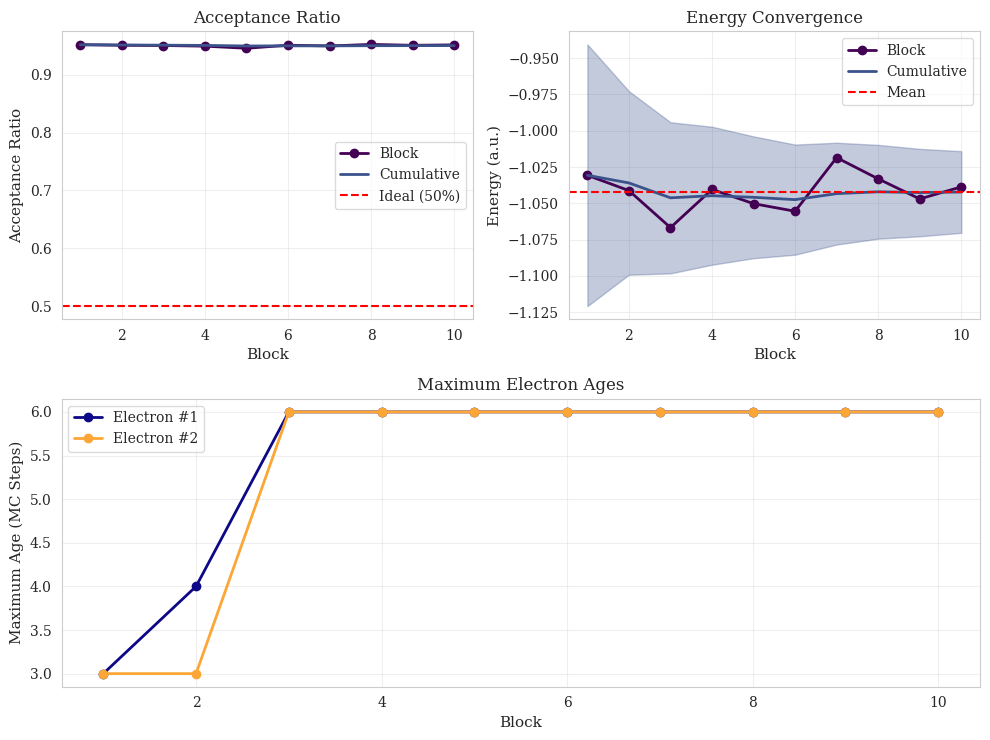

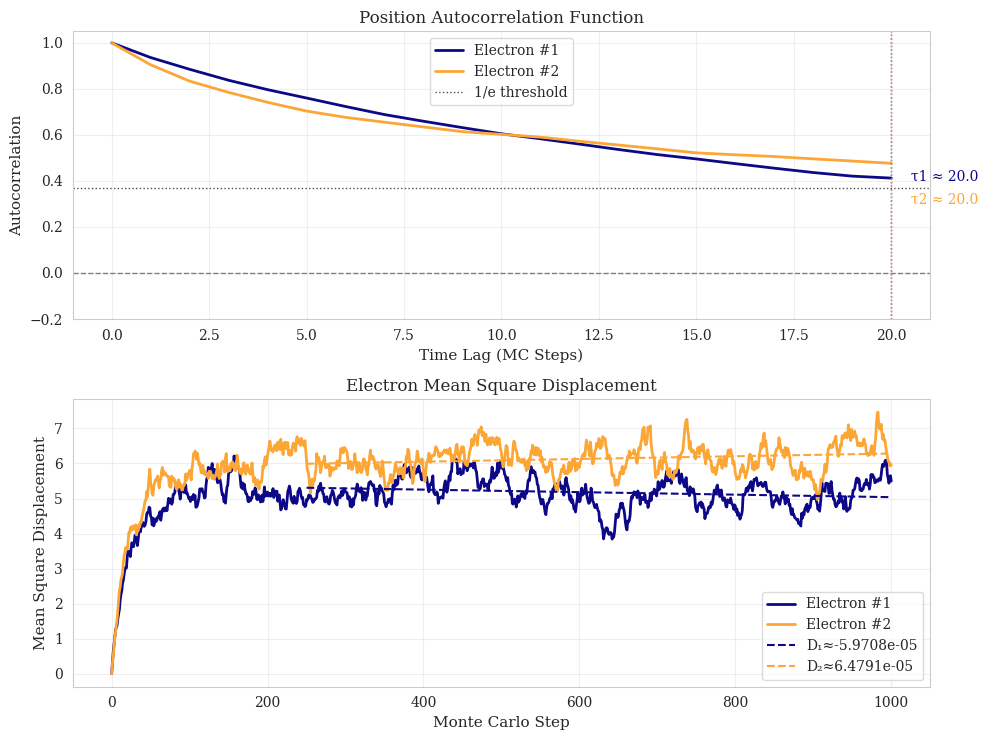

Analysis complete for !


{'Energy': '-1.042212 ± 0.004070',
 'Acceptance': '0.9502',
 'Max_Age_E1': '6',
 'Max_Age_E2': '6',
 'Autocorr_Time_E1': np.int64(20),
 'Diffusion_E1': '-5.9708e-05',
 'Diffusion_E2': '6.4791e-05'}

In [6]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_timestep_LG_0.1", dpi = 300)

In [7]:
nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [8]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="langevin",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.797110378742218
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.048035 ± 0.079291, Acceptance: 0.8077
Maximum ages: [7 9]
Block 2/10, Energy: -1.041842 ± 0.084429, Acceptance: 0.8042
Maximum ages: [9 9]
Block 3/10, Energy: -1.037880 ± 0.085013, Acceptance: 0.7952
Maximum ages: [13 10]
Block 4/10, Energy: -1.054234 ± 0.106235, Acceptance: 0.8012
Maximum ages: [13 10]
Block 5/10, Energy: -1.098814 ± 0.211230, Acceptance: 0.8000
Maximum ages: [13 12]
Block 6/10, Energy: -1.035671 ± 0.073237, Acceptance: 0.7966
Maximum ages: [13 12]
Block 7/10, Energy: -1.078402 ± 0.100640, Acceptance: 0.7992
Maximum ages: [13 12]
Block 8/10, Energy: -1.063496 ± 0.100261, Acceptance: 0.8083
Maximum ages: [13 12]
Block 9/10, Energy: -1.042789 ± 0.081688, Acceptance: 0.8000
Maximum ages: [13 16]
Block 10/10, Energy: -1.040983 ± 0.086929, Acceptance: 0.8009
Maximum ages: [13 16]

Final energy: -1.054215 ± 0.006138
Average acceptanc

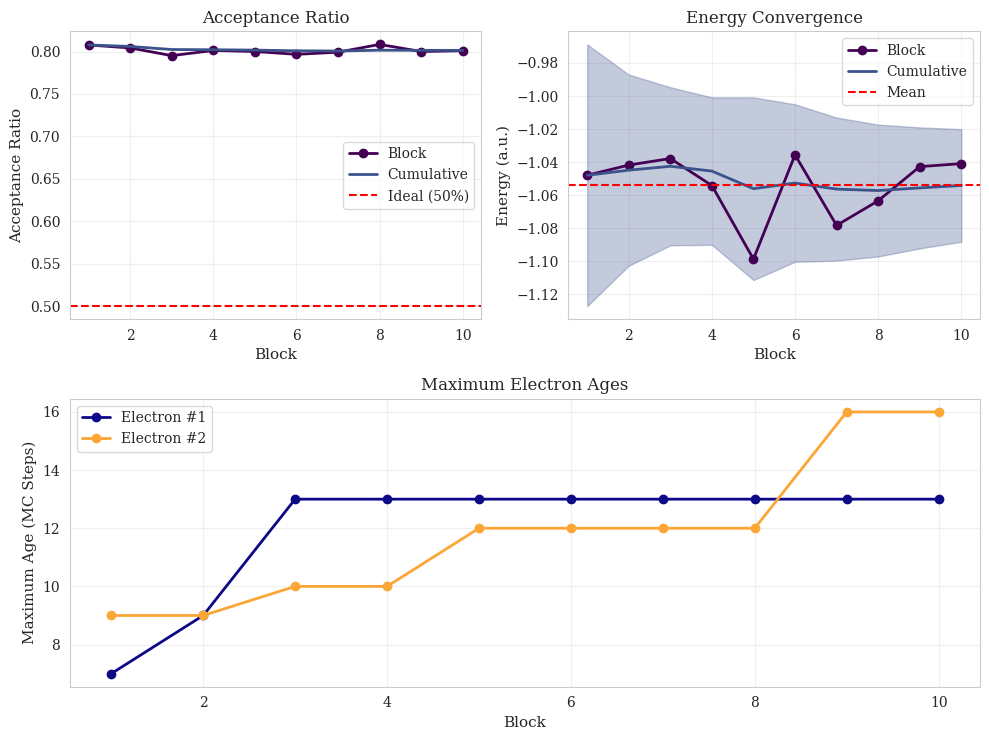

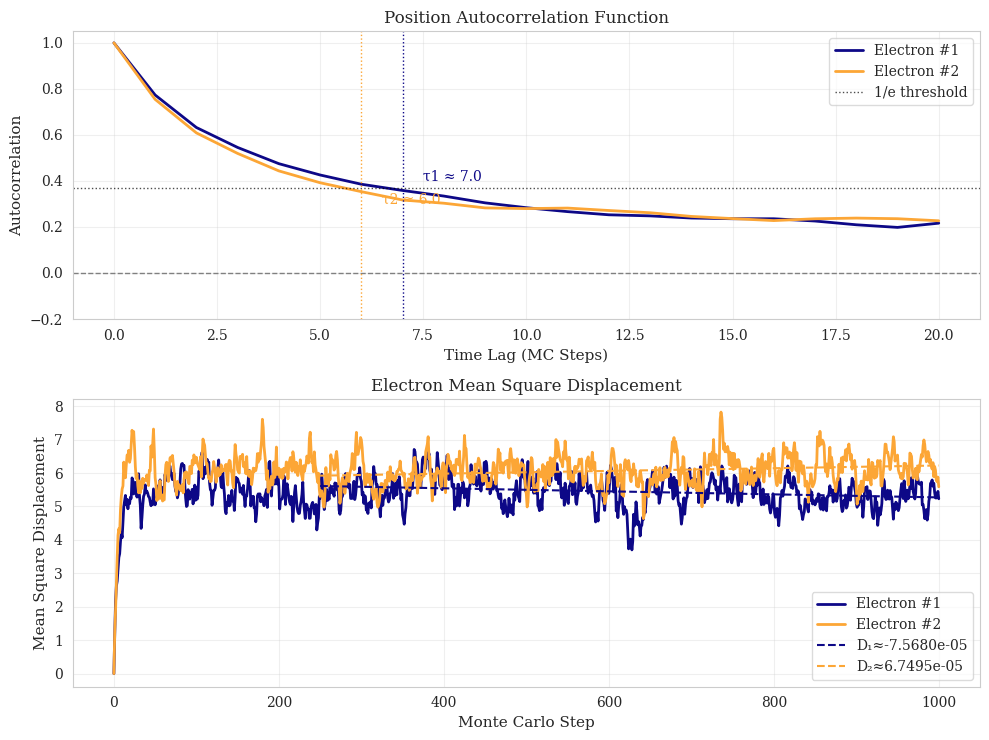

Analysis complete for !


{'Energy': '-1.054215 ± 0.006138',
 'Acceptance': '0.8013',
 'Max_Age_E1': '13',
 'Max_Age_E2': '16',
 'Autocorr_Time_E1': np.int64(6),
 'Diffusion_E1': '-7.5680e-05',
 'Diffusion_E2': '6.7495e-05'}

In [10]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_timestep_LG_0.5", dpi = 300)

In [11]:
nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [12]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=2,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="langevin",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.4091300368309021
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -0.995428 ± 0.070185, Acceptance: 0.4147
Maximum ages: [56 39]
Block 2/10, Energy: -1.105423 ± 0.082843, Acceptance: 0.4094
Maximum ages: [56 39]
Block 3/10, Energy: -1.072948 ± 0.089674, Acceptance: 0.4096
Maximum ages: [69 46]
Block 4/10, Energy: -0.979371 ± 0.093145, Acceptance: 0.4023
Maximum ages: [69 46]
Block 5/10, Energy: -1.056650 ± 0.097241, Acceptance: 0.4008
Maximum ages: [69 46]
Block 6/10, Energy: -1.054715 ± 0.067753, Acceptance: 0.4087
Maximum ages: [77 57]
Block 7/10, Energy: -1.037730 ± 0.076064, Acceptance: 0.4020
Maximum ages: [77 57]
Block 8/10, Energy: -1.064240 ± 0.078071, Acceptance: 0.4087
Maximum ages: [77 57]
Block 9/10, Energy: -1.006301 ± 0.084675, Acceptance: 0.4045
Maximum ages: [77 63]
Block 10/10, Energy: -1.044922 ± 0.070972, Acceptance: 0.4013
Maximum ages: [77 65]

Final energy: -1.041773 ± 0.011508
Average acce

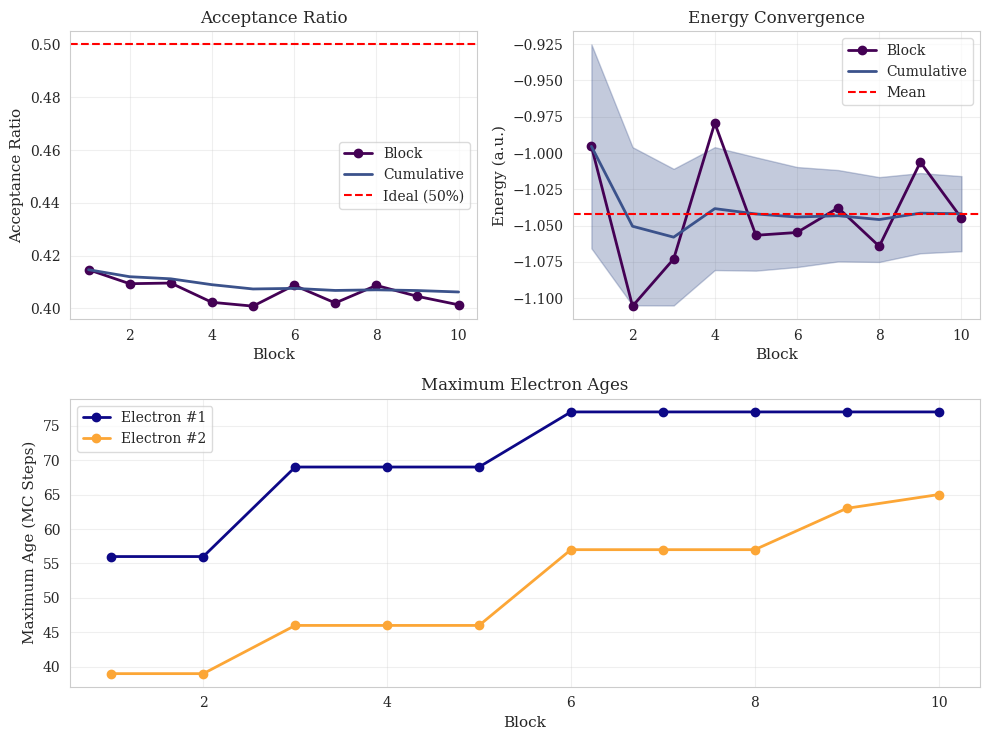

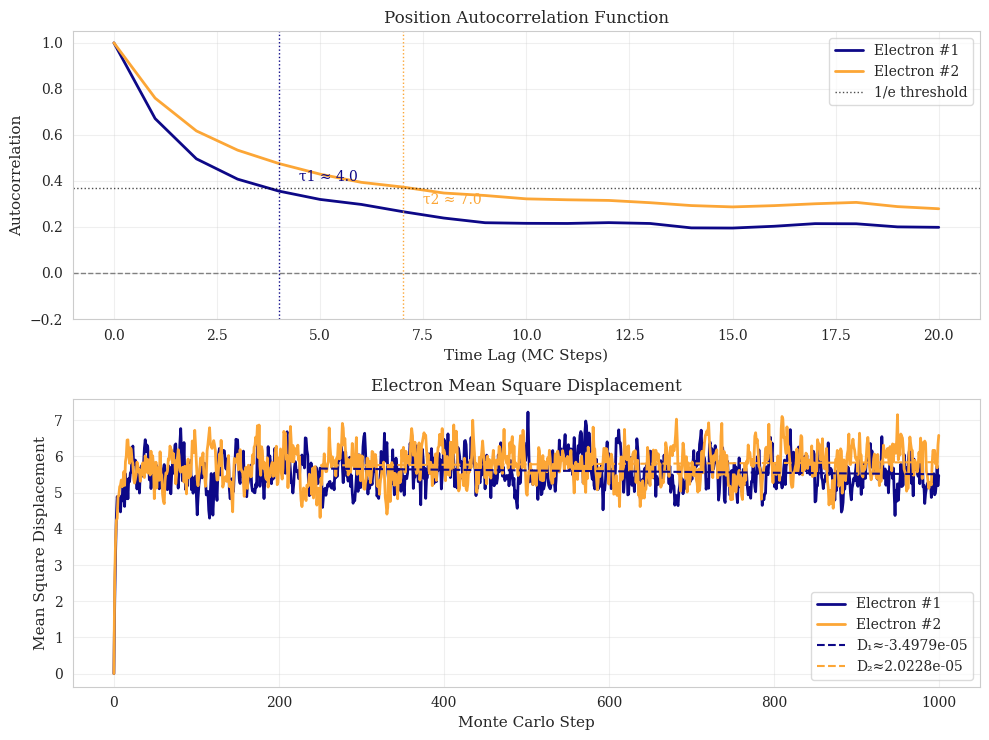

Analysis complete for !


{'Energy': '-1.041773 ± 0.011508',
 'Acceptance': '0.4062',
 'Max_Age_E1': '77',
 'Max_Age_E2': '65',
 'Autocorr_Time_E1': np.int64(7),
 'Diffusion_E1': '-3.4979e-05',
 'Diffusion_E2': '2.0228e-05'}

In [13]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_timestep_LG_2", dpi = 300)

In [14]:
nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [15]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.1,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.745940625667572
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.086723 ± 0.138927, Acceptance: 0.7459
Maximum ages: [6 5]
Block 2/10, Energy: -1.058685 ± 0.086318, Acceptance: 0.7445
Maximum ages: [7 9]
Block 3/10, Energy: -1.070257 ± 0.084157, Acceptance: 0.7475
Maximum ages: [7 9]
Block 4/10, Energy: -1.067863 ± 0.075152, Acceptance: 0.7457
Maximum ages: [7 9]
Block 5/10, Energy: -1.060930 ± 0.082373, Acceptance: 0.7441
Maximum ages: [7 9]
Block 6/10, Energy: -1.061820 ± 0.090189, Acceptance: 0.7486
Maximum ages: [7 9]
Block 7/10, Energy: -1.071417 ± 0.094356, Acceptance: 0.7451
Maximum ages: [7 9]
Block 8/10, Energy: -1.072826 ± 0.078891, Acceptance: 0.7481
Maximum ages: [9 9]
Block 9/10, Energy: -1.052282 ± 0.072705, Acceptance: 0.7441
Maximum ages: [ 9 10]
Block 10/10, Energy: -1.049179 ± 0.082619, Acceptance: 0.7456
Maximum ages: [10 10]

Final energy: -1.065199 ± 0.003299
Average acceptance ratio: 0.7

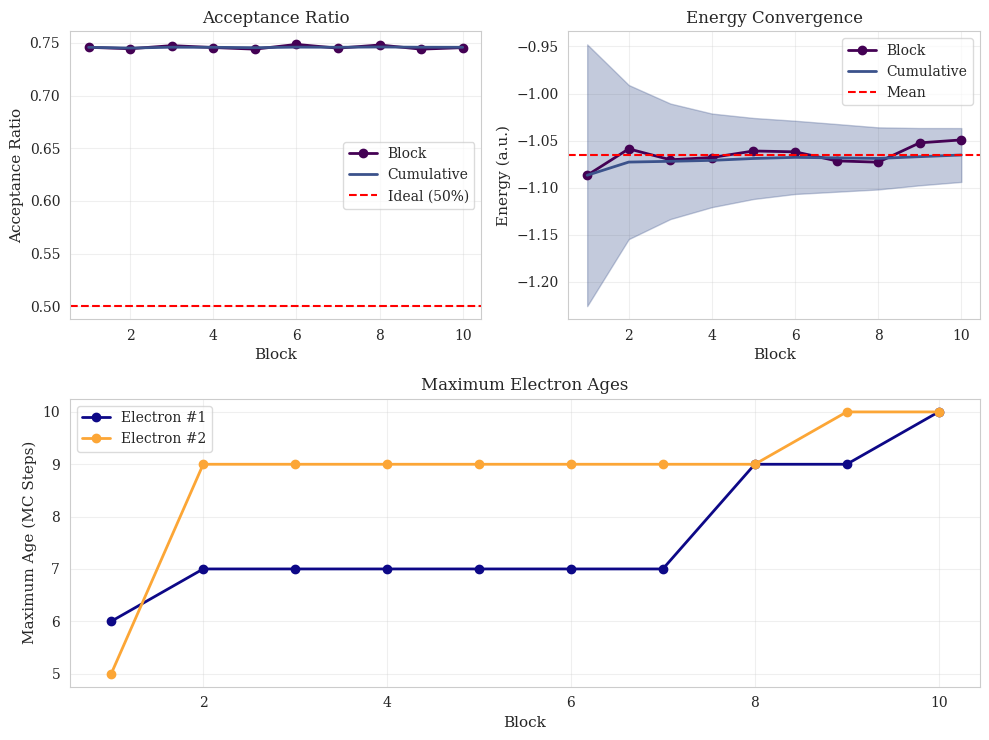

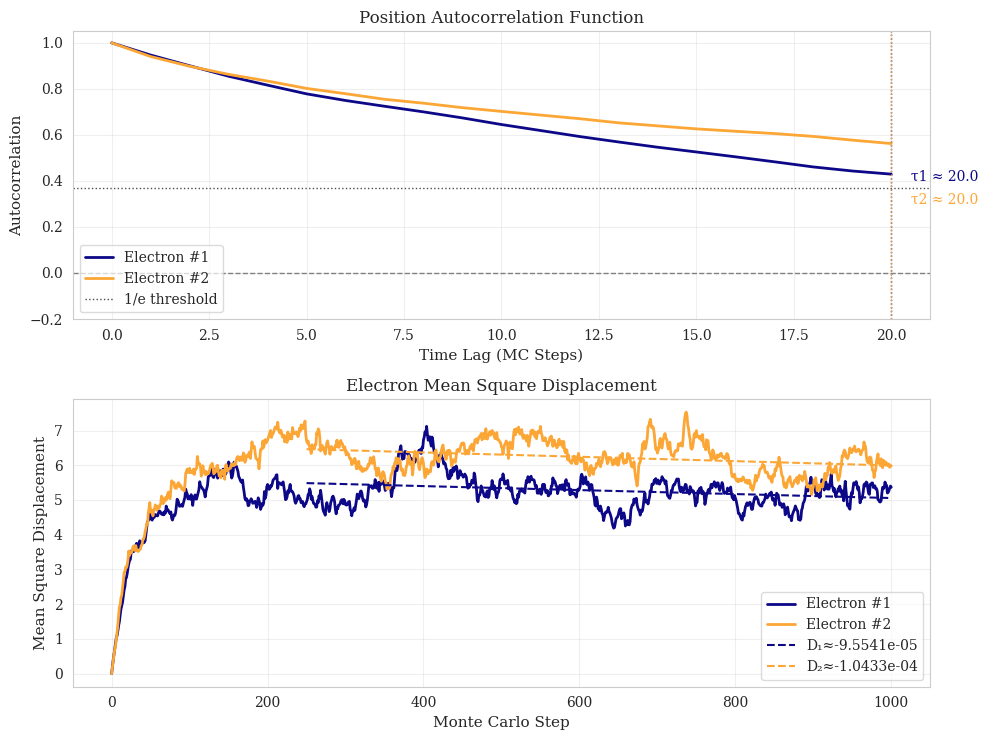

Analysis complete for !


{'Energy': '-1.065199 ± 0.003299',
 'Acceptance': '0.7459',
 'Max_Age_E1': '10',
 'Max_Age_E2': '10',
 'Autocorr_Time_E1': np.int64(20),
 'Diffusion_E1': '-9.5541e-05',
 'Diffusion_E2': '-1.0433e-04'}

In [16]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_timestep_SM_0.1", dpi = 300)

In [17]:
nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [18]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=0.5,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.5103100538253784
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.033987 ± 0.076867, Acceptance: 0.5057
Maximum ages: [15 16]
Block 2/10, Energy: -1.050752 ± 0.093524, Acceptance: 0.5076
Maximum ages: [23 24]
Block 3/10, Energy: -1.044895 ± 0.096311, Acceptance: 0.5047
Maximum ages: [23 24]
Block 4/10, Energy: -1.101280 ± 0.109490, Acceptance: 0.5052
Maximum ages: [23 24]
Block 5/10, Energy: -1.024896 ± 0.079107, Acceptance: 0.5038
Maximum ages: [23 24]
Block 6/10, Energy: -1.079332 ± 0.130356, Acceptance: 0.5069
Maximum ages: [23 24]
Block 7/10, Energy: -1.025159 ± 0.087226, Acceptance: 0.5054
Maximum ages: [23 24]
Block 8/10, Energy: -1.041073 ± 0.075266, Acceptance: 0.5118
Maximum ages: [23 24]
Block 9/10, Energy: -1.042784 ± 0.076341, Acceptance: 0.5095
Maximum ages: [23 25]
Block 10/10, Energy: -1.074143 ± 0.108165, Acceptance: 0.5057
Maximum ages: [23 25]

Final energy: -1.051830 ± 0.007551
Average acce

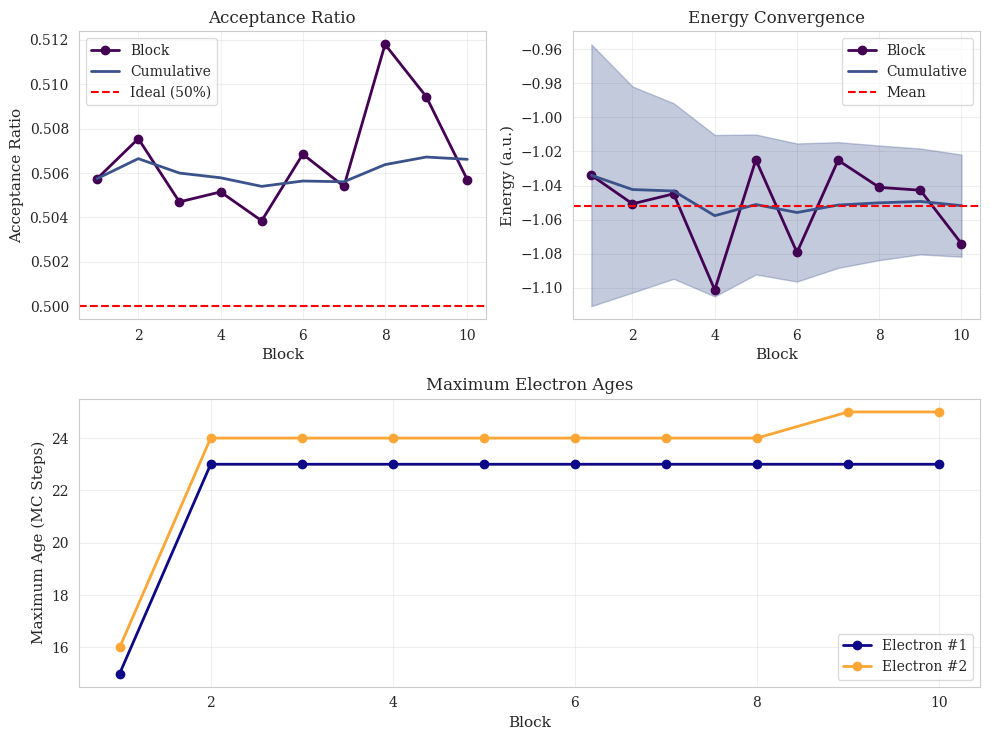

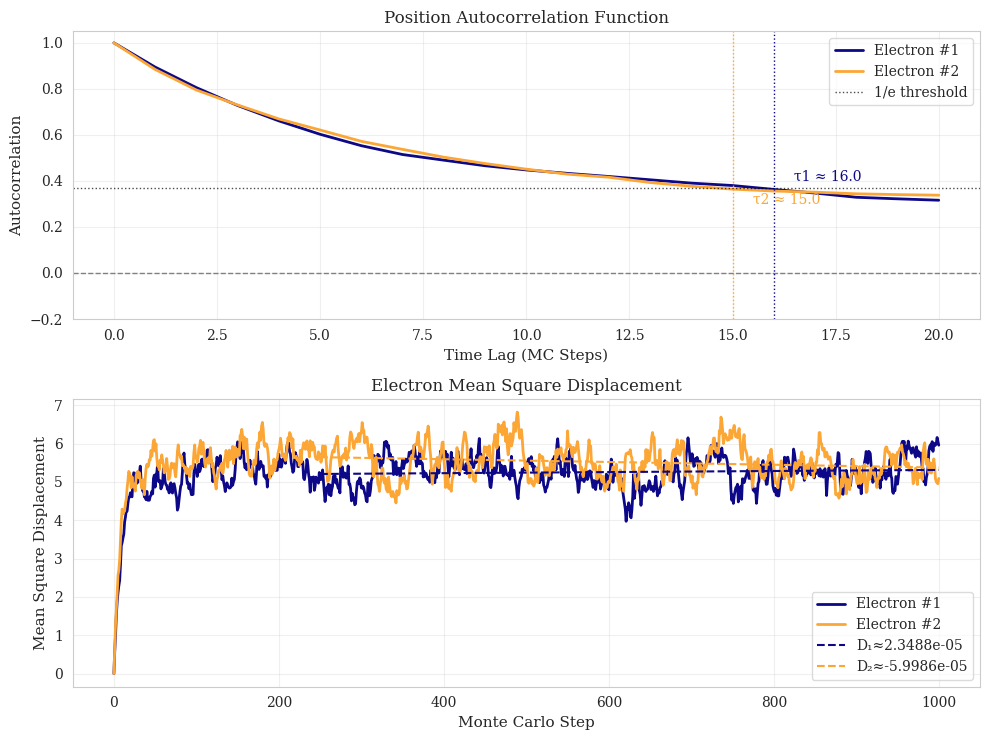

Analysis complete for !


{'Energy': '-1.051830 ± 0.007551',
 'Acceptance': '0.5066',
 'Max_Age_E1': '23',
 'Max_Age_E2': '25',
 'Autocorr_Time_E1': np.int64(15),
 'Diffusion_E1': '2.3488e-05',
 'Diffusion_E2': '-5.9986e-05'}

In [19]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_timestep_SM_0.5", dpi = 300)

In [20]:
nconfig, seed = 100, 42

coords, max_orb, det_coeff, det_map, mo_coeff, occup_hash, _nelec, nelec = \
    initialize_calculation(mol, nconfig, seed)
    
iscomplex, mo_dtype, get_phase = \
    determine_complex_settings(mo_coeff, det_coeff)

coords = jnp.array(coords)
atom_coords = jnp.array(mol.atom_coords())
atom_charges = jnp.array(mol.atom_charges())

In [21]:
results = vmc(
         coords = coords, 
         mol = mol,
         atom_charges = atom_charges,
         atom_coords = atom_coords,
         mo_coeff = mo_coeff, 
         det_coeff = det_coeff, 
         det_map = det_map, 
         _nelec = _nelec, 
         occup_hash = occup_hash,
         get_phase = get_phase,
         key = key, 
         equilibration_step=500, 
         tstep=2,
         n_blocks=10,
         nsteps_per_block=100,
         blockoffset=0,
         mode="symmetric",
         compute_autocorr=True,
         autocorr_length=20
      )

Starting equilibriation : 500 steps
Step 500 Acceptance: 0.25693994760513306
Starting production : 10 blocks of 100 steps
Block 1/10, Energy: -1.046320 ± 0.065338, Acceptance: 0.2538
Maximum ages: [46 58]
Block 2/10, Energy: -1.022224 ± 0.069941, Acceptance: 0.2580
Maximum ages: [65 58]
Block 3/10, Energy: -1.028609 ± 0.122635, Acceptance: 0.2542
Maximum ages: [65 58]
Block 4/10, Energy: -1.054533 ± 0.066552, Acceptance: 0.2430
Maximum ages: [65 77]
Block 5/10, Energy: -1.064032 ± 0.076923, Acceptance: 0.2598
Maximum ages: [65 77]
Block 6/10, Energy: -1.058404 ± 0.066751, Acceptance: 0.2595
Maximum ages: [65 77]
Block 7/10, Energy: -1.030868 ± 0.073998, Acceptance: 0.2490
Maximum ages: [84 77]
Block 8/10, Energy: -1.140023 ± 0.155471, Acceptance: 0.2564
Maximum ages: [84 77]
Block 9/10, Energy: -1.056528 ± 0.068880, Acceptance: 0.2552
Maximum ages: [84 77]
Block 10/10, Energy: -1.052697 ± 0.085426, Acceptance: 0.2551
Maximum ages: [84 77]

Final energy: -1.055424 ± 0.009878
Average acc

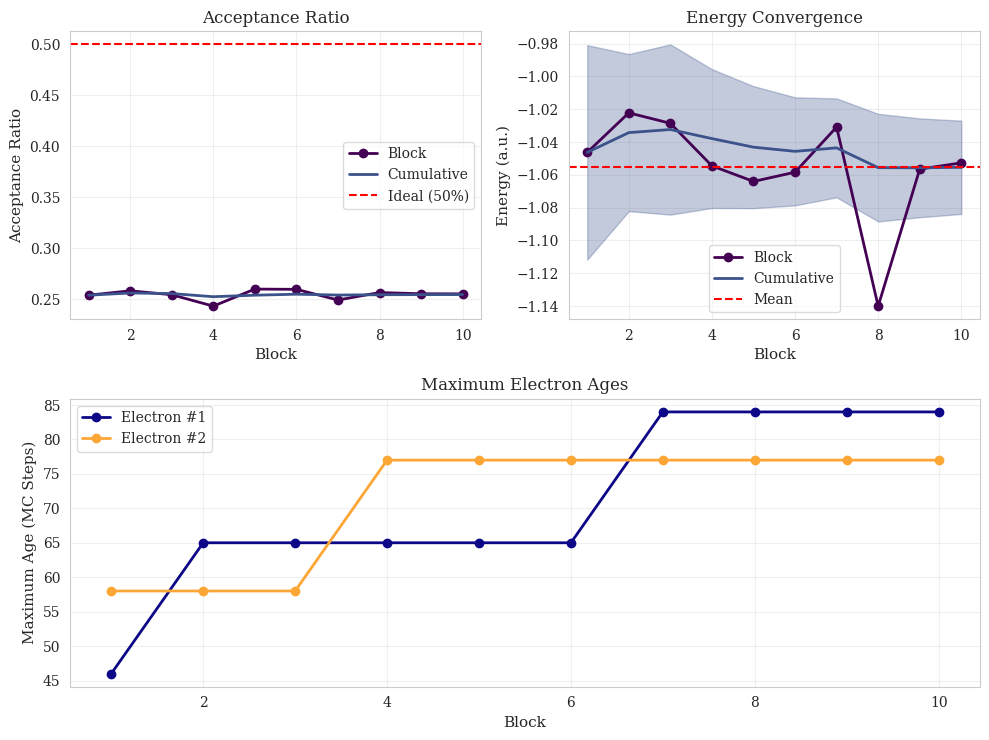

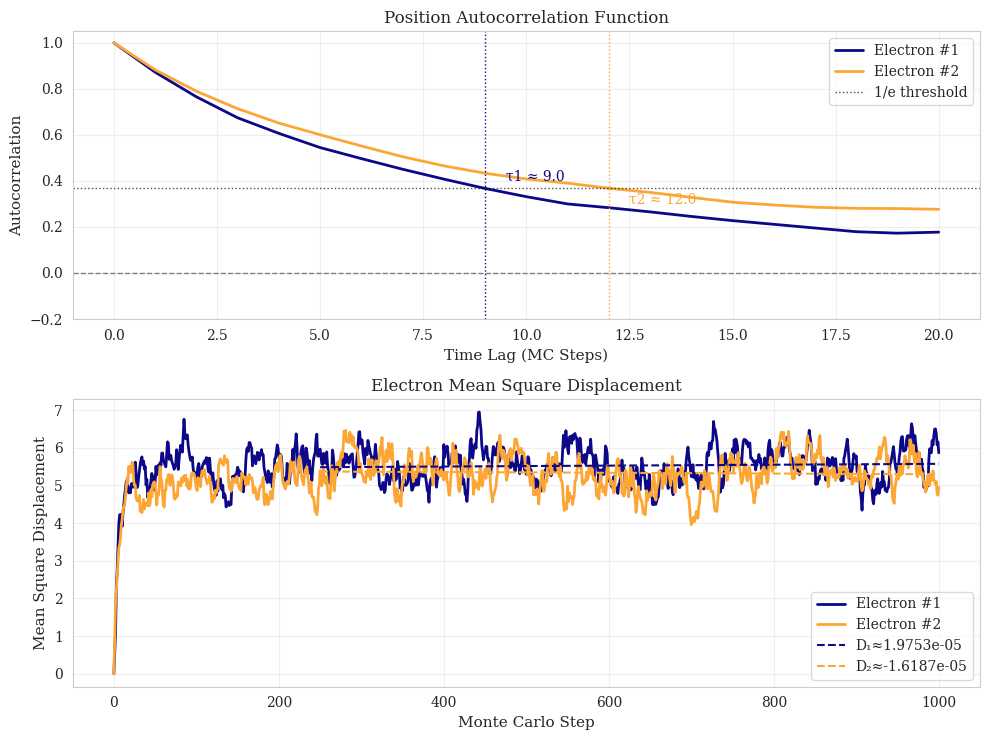

Analysis complete for !


{'Energy': '-1.055424 ± 0.009878',
 'Acceptance': '0.2544',
 'Max_Age_E1': '84',
 'Max_Age_E2': '77',
 'Autocorr_Time_E1': np.int64(12),
 'Diffusion_E1': '1.9753e-05',
 'Diffusion_E2': '-1.6187e-05'}

In [22]:
create_powerpoint_plots(results, save_plots=True, plot_dir ="./plots_timestep_SM_2", dpi = 300)